In [1]:
# Julia V0.7.0
using Gadfly, Distributions, DataFrames

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/jonathan/.julia/packages/Gadfly/ew1SM/src/mapping.jl:228


# Algorithme de Metropolis-Hastings
On simule un échantillon de la loi normale centrée réduite avec une marche aléatoire comme loi de proposition.

In [11]:
# Nombre d'itérations de l'algorithme
NITER = 10000;

# Pas de la marche aléatoire
delta = Normal(0,.1)

# Valeur initiale 
θ = [10.0]
# Vecteur indicant si on accepte on non le candidat 
acc = [false]

# Algorithme de Metropolis-Hastings
for t=2:NITER
   
    θ̃ = θ[t-1] + rand(delta)
    
    r = exp.(logpdf(Normal(0,1),θ̃)-logpdf(Normal(0,1),θ[t-1]))
    
    ρ = minimum([r,1])
    
    U = rand(Bernoulli(ρ))
    if U == 1
        push!(θ,θ̃)
        push!(acc,true)
    else
        push!(θ,θ[t-1])
        push!(acc,false)
    end
    
end

taux_acceptation = sum(acc[500:end])/length(acc[500:end])

println("Taux d'acceptation de $taux_acceptation")

Taux d'acceptation de 0.9684243763814335


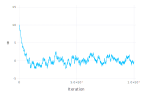

In [12]:
df = DataFrame(Iteration = collect(1:NITER),θ=θ)
plot(df,x=:Iteration, y=:θ, Geom.line)